In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

tweets = pd.read_csv('train.csv')
tweets.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [64]:
tweets['fire'] = tweets['text'].str.contains('fire')
tweets['fire'].sum()

383

In [65]:
tweets['storm'] = tweets['text'].str.contains('storm')
tweets['storm'].sum()

280

In [66]:
tweets['flood'] = tweets['text'].str.contains('flood')
tweets['flood'].sum()

99

In [67]:
tweets['death'] = tweets['text'].str.contains('death')
tweets['death'].sum()

87

In [68]:
tweets['love'] = tweets['text'].str.contains('love')
tweets['love'].sum()

92

In [69]:
tweets = tweets.drop(['id','keyword','location','text'],axis = 1)

tweets_target = tweets.loc[tweets['target'] == 1]
tweets_no_target = tweets.loc[tweets['target'] == 0]

sum_target = tweets_target.drop('target',axis = 1).sum()
sum_target

fire     284
storm    190
flood     74
death     52
love      13
dtype: int64

In [70]:
sum_no_target = tweets_no_target.drop('target',axis = 1).sum()
sum_no_target

fire     99
storm    90
flood    25
death    35
love     79
dtype: int64

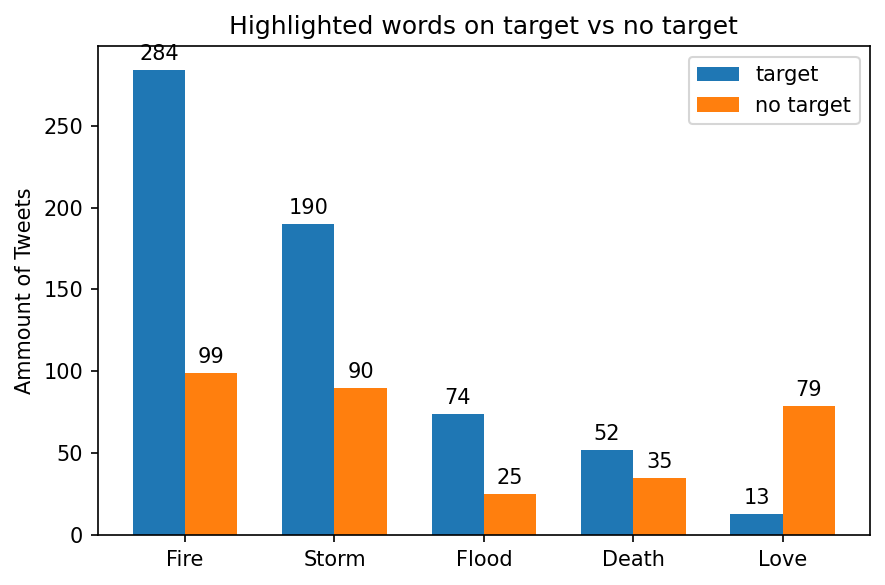

In [71]:
labels = ['Fire','Storm','Flood','Death','Love']
x = np.arange(len(labels))
width = 0.35

plt.rcParams['figure.dpi'] = 150

fig,ax = plt.subplots()
rects_target = ax.bar(x-width/2,sum_target,width,label='target')
rects_no_target = ax.bar(x+width/2,sum_no_target,width,label='no target')

ax.set_ylabel('Ammount of Tweets')
ax.set_title('Highlighted words on target vs no target')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects_target)
autolabel(rects_no_target)

fig.tight_layout()

plt.show()